# Exercice 1 - Digit classification system using different SVM classifiers
Daniel Ribeiro Cabral & Bastien Veuthey

## Imports

In [49]:
import gzip
import _pickle as cPickle

# Add your imports here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.metrics import classification_report

## Exercise's steps

The objective of this exercise is to build a classification system able to classify the images of handwritten digits (0–9) coming from the MNIST database and using SVM with different types of kernels (linear, polynomial, RBF, ...). For that purpose, you will use the SVM library available in [_Scikit-learn_](http://scikit-learn.org).

### a. Getting the training and test sample sets from the MNIST database

#### a) Load MNIST digit dataset

In [50]:
# Load training, validation (not used in the PW) and test datasets
with gzip.open("mnist.pkl.gz", "rb") as f:
    train_set, valid_set, test_set = cPickle.load(f, encoding="latin1")

# Print the shape of the various datasets
print("Training set:", len(train_set[0]))
print("Validation set:", len(valid_set[0]))
print("Test set:", len(test_set[0]))

Training set: 50000
Validation set: 10000
Test set: 10000


#### b) Visualize (plot) the images of some digits of the MNIST database

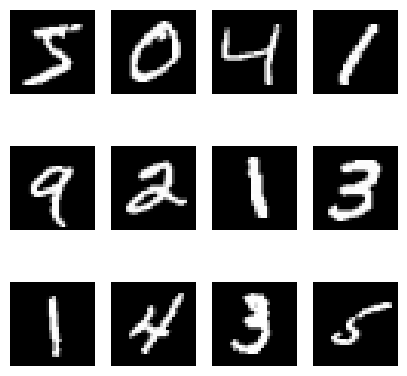

In [51]:
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

X_train, y_train = train_set

cols = 4
rows = 3

for i in range(0, cols * rows):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(X_train[i].reshape(28, 28))
    plt.axis('off')
    #plt.title('Value = %i' % y_train[i])
plt.show()

#### c) Build the final training and test sets, which should be balanced

In [52]:
# Define the number of samples per class for training and test sets again
samples_per_class_train = 200
samples_per_class_test = 100
n_classes = 10

# Separate and sample data for each class
X_train_balanced_list = []
y_train_balanced_list = []
X_test_balanced_list = []
y_test_balanced_list = []

# Separate and sample data for each class
for class_label in range(n_classes):  # For each digit from 0 to 9
    # Get indices of all samples of the current class
    class_indices = np.where(y_train == class_label)[0]

    # Shuffle indices to ensure random sampling
    np.random.shuffle(class_indices)

    # Extract samples for training
    train_indices = class_indices[:samples_per_class_train]
    X_train_balanced_list.append(X_train[train_indices])
    y_train_balanced_list.extend([class_label] * samples_per_class_train)

    # Extract samples for testing
    test_indices = class_indices[samples_per_class_train:samples_per_class_train + samples_per_class_test]
    X_test_balanced_list.append(X_train[test_indices])
    y_test_balanced_list.extend([class_label] * samples_per_class_test)

# Convert lists to arrays
X_train_balanced = np.vstack(X_train_balanced_list)
X_test_balanced = np.vstack(X_test_balanced_list)
y_train_balanced = np.array(y_train_balanced_list)
y_test_balanced = np.array(y_test_balanced_list)

# Shuffle the training and test sets
train_perm = np.random.permutation(len(y_train_balanced))
X_train = X_train_balanced[train_perm]
y_train = y_train_balanced[train_perm]

# Shuffle the training and test sets
test_perm = np.random.permutation(len(y_test_balanced))
X_test = X_test_balanced[test_perm]
y_test = y_test_balanced[test_perm]

# Check the shape and distribution of the balanced datasets
X_train_balanced.shape, X_test_balanced.shape, np.bincount(y_train_balanced), np.bincount(y_test_balanced)

((2000, 784),
 (1000, 784),
 array([200, 200, 200, 200, 200, 200, 200, 200, 200, 200]),
 array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100]))

### b. Classification of digits based on raw pixel values using SVM and different kernels

Create, train and test several SVM classifiers with different kernels (linear, polynomial, RBF, ...). For the training, perform a cross-validation using 10 folds, and test different with several $C$ and kernel parameter values (e.g. for $\gamma$ for RBF kernel) in order to get the best classifier. After the test, display the classification performances and confusion matrix of each SVM classifier (see class _metrics_).

Best estimator: SVC(C=0.1, kernel='linear')
Best score: 0.898
Classification report:               precision    recall  f1-score   support

           0       0.91      0.96      0.93       100
           1       0.87      0.98      0.92       100
           2       0.87      0.88      0.88       100
           3       0.89      0.82      0.85       100
           4       0.88      0.87      0.87       100
           5       0.88      0.84      0.86       100
           6       0.90      0.96      0.93       100
           7       0.94      0.92      0.93       100
           8       0.91      0.79      0.84       100
           9       0.86      0.87      0.87       100

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000


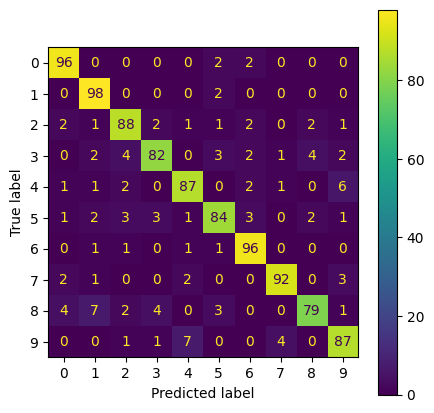

Best estimator: SVC(C=1, coef0=1, degree=4, kernel='poly')
Best score: 0.9280000000000002
Classification report:               precision    recall  f1-score   support

           0       0.93      0.98      0.96       100
           1       0.92      0.98      0.95       100
           2       0.92      0.89      0.90       100
           3       0.92      0.86      0.89       100
           4       0.93      0.90      0.91       100
           5       0.90      0.91      0.91       100
           6       0.96      0.97      0.97       100
           7       0.92      0.93      0.93       100
           8       0.95      0.89      0.92       100
           9       0.86      0.89      0.87       100

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000


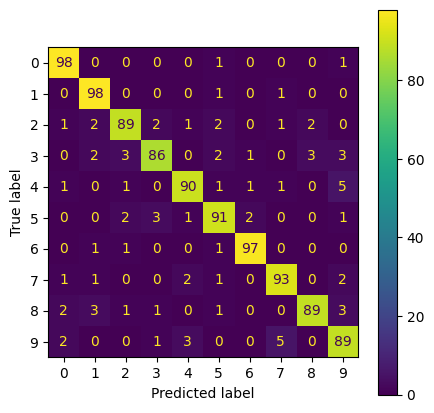

Best estimator: SVC(C=10, gamma=0.01)
Best score: 0.9339999999999999
Classification report:               precision    recall  f1-score   support

           0       0.93      0.98      0.96       100
           1       0.94      0.97      0.96       100
           2       0.90      0.94      0.92       100
           3       0.92      0.87      0.89       100
           4       0.92      0.89      0.90       100
           5       0.91      0.86      0.89       100
           6       0.94      0.97      0.96       100
           7       0.93      0.94      0.94       100
           8       0.95      0.89      0.92       100
           9       0.88      0.91      0.89       100

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000


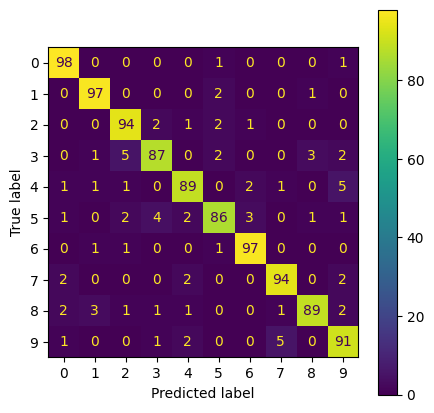

Best estimator: SVC(C=1, coef0=0, kernel='sigmoid')
Best score: 0.8695
Classification report:               precision    recall  f1-score   support

           0       0.83      0.90      0.86       100
           1       0.82      0.95      0.88       100
           2       0.87      0.81      0.84       100
           3       0.77      0.75      0.76       100
           4       0.84      0.84      0.84       100
           5       0.78      0.79      0.79       100
           6       0.91      0.96      0.94       100
           7       0.89      0.91      0.90       100
           8       0.88      0.64      0.74       100
           9       0.80      0.83      0.81       100

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000


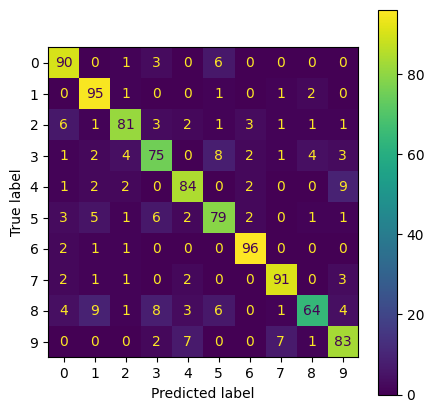

In [53]:
# Set the number of folds for Cross-Validation and SVM tuning
cv_folds = 10
C = [0.1, 1, 10, 100, 1000]
# Set the parameters by cross-validation
param_grids = [
    {'C': C, 'kernel': ['linear']},
    {'C': C, 'degree': [2, 3, 4], 'coef0': [0, 1, 2], 'kernel': ['poly']},
    {'C': C, 'gamma': [1, 1e-1, 1e-2, 1e-3, 1e-4], 'kernel': ['rbf']},
    {'C': C, 'coef0': [0, 1, 2], 'kernel': ['sigmoid']}
]

for grid in param_grids:
    classifier = GridSearchCV(estimator=SVC(), param_grid=grid, cv=cv_folds, n_jobs=-1)
    classifier.fit(X_train, y_train)
    print(f'Best estimator: {classifier.best_estimator_}')
    print(f'Best score: {classifier.best_score_}')
    print(f'Classification report: {classification_report(y_test, classifier.predict(X_test))}')
    ConfusionMatrixDisplay.from_predictions(y_test, classifier.predict(X_test))
    plt.show()

### c. (Optional) Impact of preprocessing and feature extraction

Analyse the impact of the classification performances using the following preprocessing and feature extraction steps:

#### a) Preprocessing step: convert images to binary (i.e. black and white) representations 

In [54]:
# Your code here

#### b) Feature extraction steps:
* Horizontal and vertical projections (i.e. compute the sum of grey pixel values along the the X and Y-axis)
* Local binary patterns
* Any other usable image features that you may have found

In [55]:
# Your code here

### d. Analysis of the results

Analyse the results obtained with the best SVM classifier.

a) Which kernel and parameters were used?

The kernels gave their best results with the following parameters:
* Linear kernel: C = 0.1
* Polynomial kernel: C = 1, degree = 4, coef0 = 1
* RBF kernel: C = 10, gamma = 0.01
* Sigmoid kernel: C = 1, coef0 = 0

The best kernel was the RBF with a score of 0.93 with sigmoid being the worst (0.87)

b) Which digit classes are the best/worse recognized against which? Why?

Based on RBF, the best recognized digits are 0, 1 and 6, while the worst are 3, 4, 5 and 8.
This is probably due to the fact that 0, 1 and 6 are easier to distinguish from the other digits, while 3, 4, 5 and 8 are often confused with other digits.

c) What is the impact of the sizes of the training and test sets on the classification performance?

The impact of the sizes of the training and test sets on the classification performance is that the more data we have, the better the performance is. However, the more the data, the more time it takes to train the model.